In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
# resizing all images to this
img_size = [224,224]

In [3]:
train_path = ('C:/Users/Stavan/Desktop/CBC/Dataset/train')
test_path = ('C:/Users/Stavan/Desktop/CBC/Dataset/test')

In [4]:
resnet = ResNet50(input_shape= img_size + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 17s 0us/step


In [ ]:
resnet.summary()

In [7]:
# don't train the existing weights becz they are already perfect and we have to train only the last layer
for layer in resnet.layers:
    layer.trainable = False

In [8]:
# used to get number of output classes
folders = glob('C:/Users/Stavan/Desktop/CBC/Dataset/train/*')

In [9]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Image Data Generator is used to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# read the images from the folders
training_set = train_datagen.flow_from_directory('C:/Users/Stavan/Desktop/CBC/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('C:/Users/Stavan/Desktop/CBC/Dataset/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
rsn_model = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 4.6842 - accuracy: 0.2969 - val_loss: 2.8283 - val_accuracy: 0.5345
Epoch 2/50
2/2 [==============================] - 10s 5s/step - loss: 3.0877 - accuracy: 0.4062 - val_loss: 8.1547 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 10s 5s/step - loss: 6.4672 - accuracy: 0.3125 - val_loss: 3.2569 - val_accuracy: 0.5345
Epoch 4/50
2/2 [==============================] - 10s 5s/step - loss: 2.6789 - accuracy: 0.4062 - val_loss: 2.1094 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 10s 5s/step - loss: 2.2799 - accuracy: 0.3906 - val_loss: 2.3594 - val_accuracy: 0.3448
Epoch 6/50
2/2 [==============================] - 10s 5s/step - loss: 1.5360 - accuracy: 0.4062 - val_loss: 1.6951 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 10s 5s/step - loss: 1.8516 - accuracy: 0.5469 

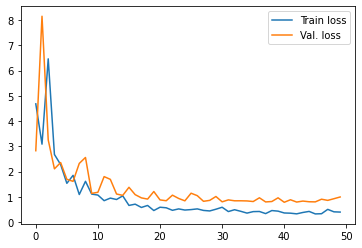

In [23]:
# plotting the loss
plt.plot(rsn_model.history['loss'], label='Train loss')
plt.plot(rsn_model.history['val_loss'], label='Val. loss')
plt.legend()
plt.show()

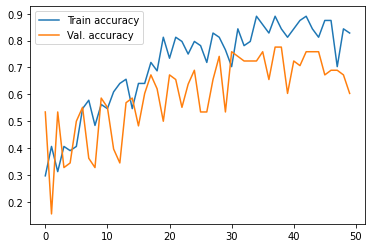

In [22]:
# plotting the accuracy
plt.plot(rsn_model.history['accuracy'], label='Train accuracy')
plt.plot(rsn_model.history['val_accuracy'], label='Val. accuracy')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[4.61098105e-02, 2.60635972e-01, 6.93254232e-01],
       [6.50128303e-03, 8.60705897e-02, 9.07428145e-01],
       [1.81056408e-03, 9.78230238e-01, 1.99592300e-02],
       [3.95309143e-02, 5.11069238e-01, 4.49399799e-01],
       [3.02051734e-02, 7.49657750e-01, 2.20137134e-01],
       [1.88434914e-01, 6.09457850e-01, 2.02107161e-01],
       [8.58653486e-02, 2.79691443e-02, 8.86165440e-01],
       [3.29709165e-02, 7.29124621e-02, 8.94116700e-01],
       [1.42150810e-02, 3.99922108e-04, 9.85385001e-01],
       [3.06803640e-02, 1.39780149e-01, 8.29539537e-01],
       [2.16841102e-01, 1.18015088e-01, 6.65143847e-01],
       [6.40378287e-03, 9.89996433e-01, 3.59976501e-03],
       [2.02547442e-02, 1.43005833e-01, 8.36739421e-01],
       [1.30450480e-05, 6.16198813e-05, 9.99925375e-01],
       [3.32023413e-03, 1.43509638e-02, 9.82328832e-01],
       [2.83918921e-02, 5.28640389e-01, 4.42967743e-01],
       [4.69792672e-02, 4.78658020e-01, 4.74362731e-01],
       [8.66910219e-02, 1.10969

In [28]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model = load_model('C:/Users/Stavan/Desktop/CBC/model_resnet50.h5')

In [58]:
emage = image.load_img('C:/Users/Stavan/Desktop/CBC/Dataset/Test/mercedes/29.jpg',target_size=(224,224))

In [59]:
x = image.img_to_array(emage)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]]

In [60]:
x.shape

(224, 224, 3)

In [61]:
x = x/255

In [62]:
x = np.expand_dims(x, axis=0)
emage_data = preprocess_input(x)
emage_data.shape

(1, 224, 224, 3)

In [63]:
a = model.predict(emage_data)
a

array([[1.5497555e-04, 3.9005313e-06, 9.9984109e-01]], dtype=float32)

In [64]:
b = np.argmax(a)
b

2

In [65]:
b == 2

True

In [1]:
# Disclaimer:

# This was just a simple model created.
# Train on more images to get better accuracy.